# Welcome to the Distance Ladder Project!

Hey guys ~~~~
hope you're going well!
first, let's look at our galaxy...

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

ddir = "universe_8/"
data = pd.read_csv(ddir + 'combined_stars.csv')

Name, X_stars, Y_stars, rad_velocity, parallax = data["Name"] , data["X"], data["Y"], data["RadialVelocity"], data["Parallax"]


Let's have a look at our local universe!!

1721


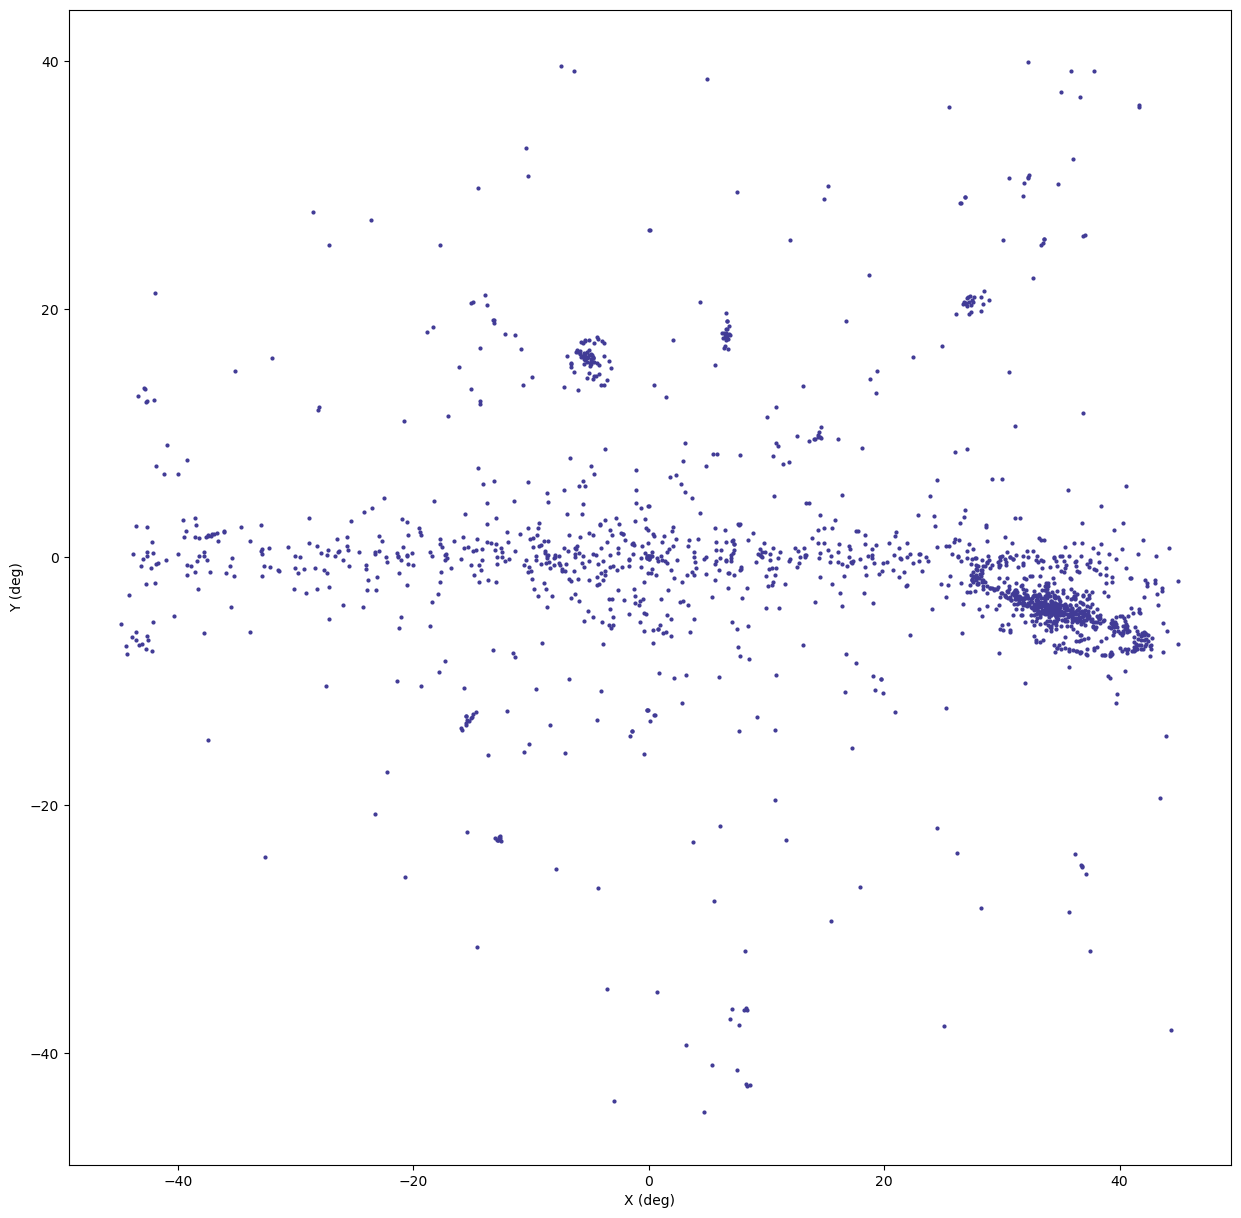

In [16]:

star_index = [i for i, x in enumerate(parallax) if x > 0.001]

X_pos = [X_stars[i] for i in star_index]  
Y_pos = [Y_stars[i] for i in star_index]

print(len(star_index))
# plot
fig = plt.figure(figsize=(15, 15))  
ax = fig.add_subplot(1, 1, 1)    
ax.scatter(X_pos, Y_pos, s=4, c='#413b96') 
#ax.set_facecolor('midnightblue')
ax.set_xlabel('X (deg)')
ax.set_ylabel('Y (deg)') 

plt.show()  


In [17]:
import numpy as np  
from csv import DictWriter

parallax = np.array(parallax[star_index])
distance = (1 / parallax)
#dst_lbl = ["distance" for x in range(len(parallax))]

x_rad, y_rad = np.radians(X_pos), np.radians(Y_pos) 
x = distance * np.cos(x_rad) * np.sin(y_rad)
y = distance * np.sin(x_rad) * np.sin(y_rad)
z = distance * np.cos(y_rad)

#fig = plt.figure(figsize=(10, 10));  
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, s=0.5)
ax.set_xlabel('pc')
ax.set_ylabel('pc') 
ax.set_zlabel('pc')

#df = pd.DataFrame(distance)
#df.to_csv('distance.csv', index=False)

Text(0.5, 0, 'pc')

I'll just isolate OUR galaxy

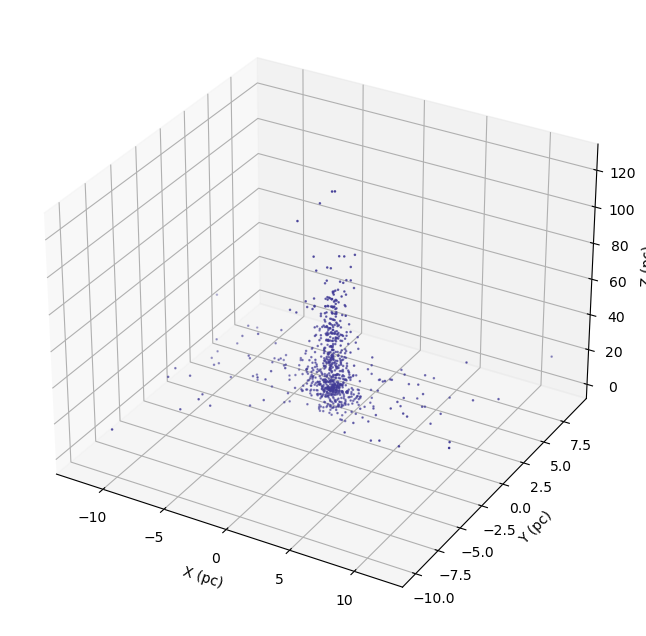

In [20]:


closeindexes =  [i for i, x in enumerate(parallax) if x > 0.007] # restriction step

closex = x[closeindexes]; closey = y[closeindexes]; closez = z[closeindexes]; # get the XYZ of close stars
fig = plt.figure(figsize=(8, 8));  # and now plot
ax = fig.add_subplot(projection='3d')
ax.scatter(closex, closey, closez, s=0.7, color="#413b96"); 
ax.set_xlabel('X (pc)'); ax.set_ylabel('Y (pc)'); ax.set_zlabel('Z (pc)');

plt.show()


In [21]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

variables = data["Variable?"] 
print(len(parallax))
variableindexes = [i for i, x in enumerate(parallax) if x > 0.001 and variables[i] == 1] 
starnames = data['Name']
starnames = [i for i in starnames]
#print(starnames)
variablenames = [starnames[i] for i in variableindexes]
print(variablenames)
variableparallaxes = np.array([data["Parallax"][i] for i in variableindexes])

Vfluxes = data['GreenF']; variableVfluxes = np.array([Vfluxes[i] for i in variableindexes])
variableVlumins = variableVfluxes * 4 * np.pi * ((1 / variableparallaxes) * 3.086 * 10**16)**2


1721
['BackS016039', 'BackS016052', 'BackS016058', 'BackS016070', 'BackS016089', 'BackS016091', 'BackS016134', 'BackS016239', 'BackS016296', 'BackS016439', 'BackS016466', 'BackS016602', 'BackS016873', 'BackS017073', 'BackS017102', 'BackS017175', 'BackS017368', 'BackS017385', 'BackS017403', 'BackS017490', 'BackS017573', 'BackS017587', 'BackS017657', 'BackS017758', 'BackS017774', 'BackS017913', 'BackS018015', 'BackS018048', 'BackS018154', 'BackS018318', 'BackS018383', 'BackS018533', 'BackS018606', 'BackS018610', 'BackS018617', 'BackS018654', 'BackS018678', 'BackS018698', 'BackS018699', 'BackS018727', 'BackS018734', 'BackS018742', 'BackS018763', 'BackS018775', 'BackS018777', 'BackS018799', 'BackS018821', 'BackS018826', 'BackS018831', 'BackS018843', 'BackS018846', 'BackS018848', 'BackS018878', 'BackS018886', 'BackS018908', 'BackS018911', 'BackS018916', 'BackS018920', 'BackS018935', 'BackS018951', 'BackS018953', 'BackS018988', 'BackS018992', 'BackS018993', 'BackS019038', 'BackS019040', 'Bac

took some of enid's code for this one but optimised it for jupyter notebook annoyingness, thanks for the code enid!

universe_8/Variable_Star_Data\BackS016134.csv
      Time  NormalisedFlux
0      0.0        0.979205
1      1.0        0.921203
2      2.0        0.919348
3      3.0        0.931402
4      4.0        0.964911
..     ...             ...
116  116.0        1.016342
117  117.0        1.036605
118  118.0        1.083879
119  119.0        1.064576
120  120.0        1.057073

[121 rows x 2 columns]


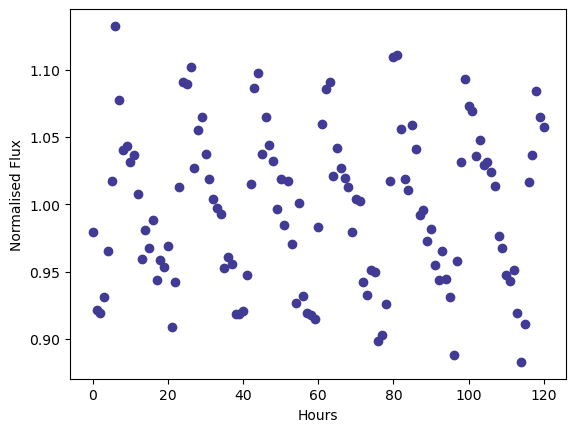

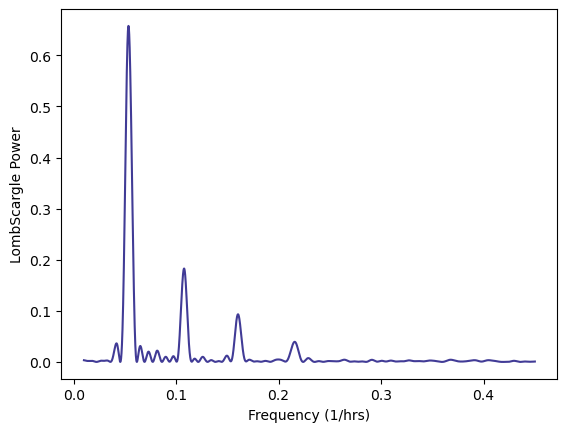

Most likely period: 18.72 h


In [22]:
from astropy.timeseries import LombScargle
from glob import glob


fnames = glob(ddir + "Variable_Star_Data/*.csv")

freqs = np.linspace(1/100,0.45,10000)


for lightcurve in fnames[6:]: 
    print(lightcurve)
    if lightcurve[len(ddir)+19:-4] in variablenames: 
        
        
        
        data = pd.read_csv(lightcurve)
        print(data)
        time, flux = data['Time'], data['NormalisedFlux'] 
        plt.scatter(time, flux, color="#413b96"); 
        plt.xlabel('Hours'); plt.ylabel('Normalised Flux'); plt.show()
        LS = LombScargle(time, flux) 
        power = LS.power(freqs)
        plt.plot(freqs, power, color="#413b96"); 
        plt.xlabel('Frequency (1/hrs)')
        plt.ylabel('LombScargle Power')
        plt.show()
        print('Most likely period: %.2f h' % (1 / freqs[np.argmax(power)]))
  
        break     

In [23]:
periods = []   
variablepath = ddir + '/Variable_Star_Data/'

for lightcurve in fnames:
    #print(lightcurve[len(variablepath)-1:-4])
    if lightcurve[len(variablepath)-1:-4] in variablenames: 
       
        data = pd.read_csv(lightcurve) # load in the data
        time, flux = data['Time'], data['NormalisedFlux'] # just extract the columns as variables
        LS = LombScargle(time, flux) # initialize a Lomb-Scargle fitting
        power = LS.power(freqs) # calculate LS power 
        bestfreq = freqs[np.argmax(power)] # which frequency has the highest Lomb-Scargle power?
        pred = LS.model(time, bestfreq) # make a sine wave prediction at the best frequency
        periods.append(1 / bestfreq) # add each period to the list
    
periods = np.array(periods) # turn it from a list to an array
print(periods)

[41.37460173 20.63564132 22.16532553 20.48681542 53.31378299 20.72976055
 18.71525633 53.43915344 56.63551402 21.76203017 54.59459459 52.57374205
 54.2039356  52.57374205 50.81050866 56.91922354 51.73591349 51.03874228
 54.33353258 54.59459459 53.0647986  52.45239469 52.09169054 54.46375075
 51.85396463 50.58430718 54.07495538 54.72606863 54.46375075 51.38496326
 57.2057898  19.63707064 50.47196002 20.30377485 53.43915344 21.65832738
 19.33631142 53.31378299 22.71932017 21.19375146 22.03636364 53.0647986
 19.58629606 19.23809524 21.15429369 21.13461986 21.72043011 18.71525633
 20.19551211 19.50225274 52.45239469 20.97853681 20.07065577 56.77701437
 54.72606863 22.23037417 56.21521336 20.61691994 20.50530115 22.78766608
 19.92983995 20.92059839 21.21353559 20.24949877 54.46375075 19.06059971
 21.45385886 55.80110497 18.53211009 50.69715561 56.63551402 20.5795789
 52.33160622 52.94117647 21.09538176 54.59459459 19.56942949 52.45239469
 53.43915344 20.12397609 20.12397609 50.92436975 20.1

109


Text(0, 0.5, 'V-band Luminosity (W)')

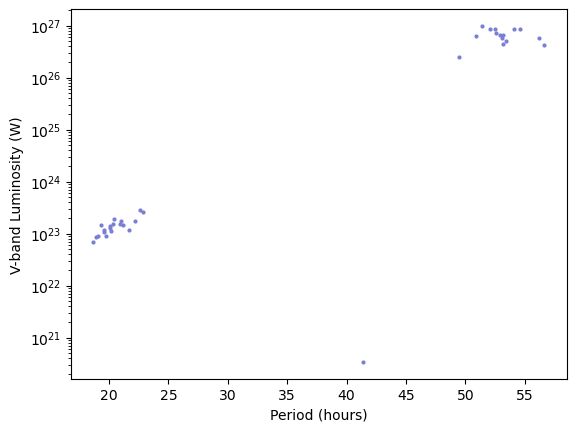

In [24]:
fig, ax = plt.subplots()
print(len(periods))
ax.scatter(periods, variableVlumins, s=4, color="#7b7fd4")
ax.set_yscale('log')
ax.set_xlabel('Period (hours)')
ax.set_ylabel('V-band Luminosity (W)')

In [26]:
def monte_carlo(xdata, xuncs, ydata, yuncs, iterations):

    # initialise arrays to store our data in
    grads = np.zeros(iterations)
    yints = np.zeros(iterations)
    x_rand = np.zeros(len(xdata))
    y_rand = np.zeros(len(xdata))
    #print(x_rand)
    
    # if our uncertainty is a scalar, make it an array with N times that value (N being the length of our data array)
    if np.size(xuncs) == 1:
        xuncs = np.ones(len(xdata)) * xuncs
    if np.size(yuncs) == 1:
        yuncs = np.ones(len(ydata)) * yuncs
    
    # now to perform n=iterations random samples of our data distributions
    for i in range(iterations):
        for j in range(len(xdata)):
            # generate a random normal variable for each of our XY data points
            x_rand[j] = np.random.normal(xdata[j], xuncs[j])
            y_rand[j] = np.random.normal(ydata[j], yuncs[j])
            
            
        # now fit a line to our random data. A 1-dimensional polynomial is just a straight line!
        grads[i], yints[i] = np.polyfit(x_rand, y_rand, 1)
        
    
    # now get the statistics of our *iterations* number of trendline parameters
    meangrad = np.mean(grads[:i])
    SDgrad = np.std(grads[:i])
    meanyint = np.mean(yints[:i])
    SDyint = np.std(yints[:i])
    return np.array([meangrad, SDgrad, meanyint, SDyint])



[0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518, 0.004342944819032518]
[nan nan nan nan]
Short grad = nan±nan; Short y-int = nan±nan


c:\Users\neha\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


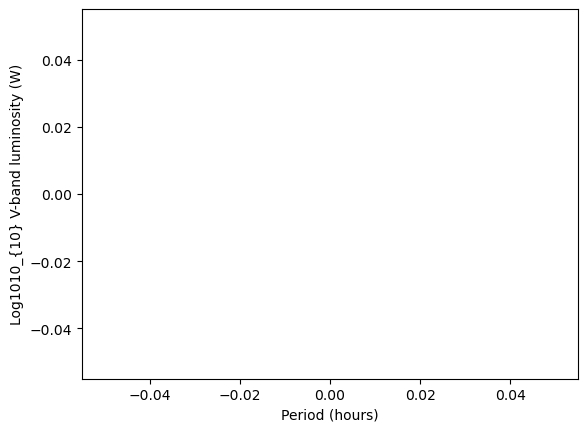

In [27]:

# we need to do another step to remove the outlier(s) at the bottom. Check to see if lumins for each index are high
# enough luminosity:



lowperiodunc = []
for i in range(len(lowperiods)):
    unc = 0.01 / np.log(10)
    lowperiodunc.append(unc)

#lowperiodunc = [i for i in range(len(lowperiods)) where i = 0.01 / np.log(10)]
#0.01 / np.log(10)
print(lowperiodunc)



# now, lets fit a linear trend to this data. We can do this with a polynomial fit of one degree from numpy:
shortgradient, shortgradSD, shortyint, shortyintSD = monte_carlo(lowperiods, lowperiodunc, lowperiodlumins, lowperiodunc, 20000)
print(monte_carlo(lowperiods, lowperiodunc, lowperiodlumins, lowperiodunc, 20000))
print(f"Short grad = {round(shortgradient, 3)}±{round(shortgradSD, 3)}; Short y-int = {round(shortyint, 2)}±{round(shortyintSD, 2)}")
fitperiods = np.linspace(min(lowperiods), max(lowperiods), 10)
fitlumins = shortgradient * fitperiods + shortyint

fig, ax = plt.subplots()
# ax.scatter(lowperiods, lowperiodlumins);
ax.errorbar(lowperiods, lowperiodlumins, xerr=0.1, yerr=lowperiodunc, fmt='.', lw=1)
ax.plot(fitperiods, fitlumins, 'r-')
ax.set_xlabel('Period (hours)'); ax.set_ylabel(r'Log1010_{10} V-band luminosity (W)');


Longer grad = nan±nan; Longer y-int = nan±nan


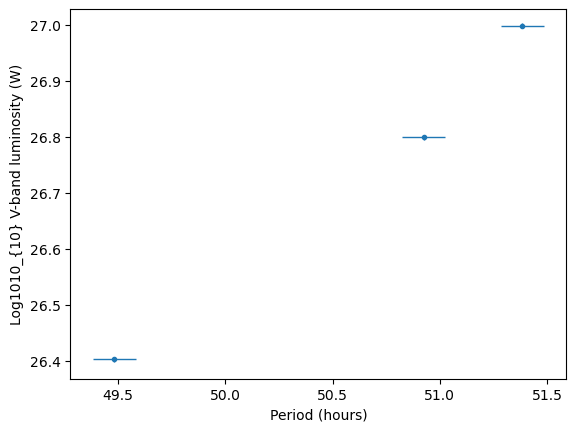

In [28]:
longerperiodindexes = [i for i, x in enumerate(periods) if 30 <= x <= 52]
# we need to do another step to remove the outlier(s) at the bottom. Check to see if lumins for each index are high
# enough luminosity:
longerperiodindexes = [longerperiodindexes[i] for i, x in enumerate(variableVlumins[longerperiodindexes]) if x > 10**23]
longerperiods = periods[longerperiodindexes]
longerperiodlumins = np.log10(variableVlumins[longerperiodindexes]) # get lumins in log scale
longerperiodunc = 0.01 / np.log(10)

# now, lets fit a linear trend to this data. We can do this with a polynomial fit of one degree from numpy:
longergradient, longergradSD, longeryint, longeryintSD = monte_carlo(longerperiods, 0.1, longerperiodlumins, longerperiodunc, 20000)
print(f"Longer grad = {round(longergradient, 3)}±{round(longergradSD, 3)}; Longer y-int = {round(longeryint, 2)}±{round(longeryintSD, 2)}")
fitperiods = np.linspace(min(longerperiods), max(longerperiods), 10)
fitlumins = longergradient * fitperiods + longeryint

fig, ax = plt.subplots()
ax.errorbar(longerperiods, longerperiodlumins, xerr=0.1, yerr=longerperiodunc, fmt='.', lw=1)
ax.plot(fitperiods, fitlumins, 'r-')
ax.set_xlabel('Period (hours)'); ax.set_ylabel(r'Log1010_{10} V-band luminosity (W)');